## Model selection
### Import thư viện

In [1]:
import numpy as np
from statistics import mean, stdev
from sklearn.model_selection import StratifiedKFold
import time
import os
import pickle
import random
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

### Đánh giá hiệu quả mô hình
#### Chia tập train, test


In [2]:
# load file data đã tiền xử lý
data = pd.read_csv('./preprocessed_data/preprocessed_data.csv')
X = data['inputs'].values
y = data['outputs'].values
print('Kích thước tập dữ liệu: ', X.shape[0])

Kích thước tập dữ liệu:  7999


In [3]:
# lấy mẫu một số dữ liệu
for i in random.choices(range(X.shape[0]), k=10):
    print('----------------------------')
    print('Label: ', y[i])
    print('Data: ', X[i])

----------------------------
Label:  y-hoc
Data:  tủ_sách bảo_vệ sức_khỏe gia_đình hô_hấp tủ_sách bảo_vệ sức_khỏe gia_đình hô_hấp tủ_sách bảo_vệ sức_khỏe gia_đình biên_soạn nguồn tư_liệu giá_trị trình_bày hầu_hết kiến_thức cơ_bản cần_thiết thực_hành y_khoa ngoài hiểu_biết cơ_bản nội_dung sâu lĩnh_vực chẩn_đoán điều_trị biện_pháp phòng_bệnh vì_thế tuy nhắm đối_tượng độc_giả chuyên_môn ngành y_tế cung_cấp thông_tin tham_khảo cần_thiết trường_hợp đặc_biệt đối_với độc_giả phổ_thông kiến_thức cung_cấp vô_cùng bổ_ích bảo_vệ sức_khỏe bản_thân gia_đình tủ_sách bảo_vệ sức_khỏe gia_đình hô_hấp
----------------------------
Label:  y-hoc
Data:  văn_hoá ứng_xử sức_khoẻ tim_mạch nhồi_máu cơ_tim tai_biến mạch_máu não tai_họa đột_ngột bất_ngờ nếu cảnh_giác cao hiểu_biết sâu hiểu_biết sức_mạnh van_tim hậu thấp cao huyết_áp xơ_vữa động_mạch tên sát_nhân ngăn_chặn nhờ hiểu đúng đừng coi_thường tim_mạch nói_chung chúng tự ắt_hẳn chịu_thua chúng hiện_nay công_tác vệ_sinh phòng_dịch điều_trị dự_phòng trình_

In [4]:
# Khởi tạo StratifiedKFold object cho tập train và tập valid
num_folds = 10
rstate = 1
spliter = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=rstate)

In [5]:
# tách 1/4 tập dataset để làm tập test, còn lại 3/4 làm train và valid
train_test_split = StratifiedKFold(n_splits=4, shuffle=True, random_state=rstate)
train_index, test_index = next(train_test_split.split(X, y))
X_train = np.array(X[train_index])
y_train = np.array(y[train_index])
X_test = np.array(X[test_index])
y_test = np.array(y[test_index])

print('Kích thước tập train: ', X_train.shape[0])
print('Kích thước tập test: ', X_test.shape[0])



Kích thước tập train:  5999
Kích thước tập test:  2000


#### Chọn độ đo


In [6]:
from sklearn.metrics import accuracy_score, f1_score

### Bộ trích chọn đặc trưng


In [7]:
# Tạo thư mục lưu mô hình
save_dir = './saved_model'

if not os.path.exists(save_dir):
    os.mkdir(save_dir)

In [8]:
# Đánh giá độ hiệu quả của bộ trích chọn đặc trưng
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline


feature_extractor = Pipeline([
    ('vectorizer', CountVectorizer(stop_words=None)),
    ('tf-idf', TfidfTransformer()),
])

train_features = feature_extractor.fit_transform(X_train, y_train)
pickle.dump(feature_extractor, open('./saved_model/feature_extractor.sav', 'wb'))
print('Kích thước vector input: ', train_features.shape[1])

Kích thước vector input:  27514


In [9]:
labels = sorted(set(y))
print('Danh sách nhãn')
for label in labels:
    print('\t', label)

Danh sách nhãn
	 am-nhac-1
	 chinh-tri-triet-hoc
	 du-lich-1
	 khoa-hoc-co-ban
	 khoa-hoc-ky-thuat
	 khoa-hoc-tu-nhien-xa-hoi
	 lich-su-dia-ly
	 my-thuat-kien-truc
	 nghiep-vu-bao-chi
	 nong-lam-nghiep
	 phap-luat-1
	 sach-hoc-nghe
	 sach-ton-giao
	 the-thao
	 van-hoa-nghe-thuat
	 y-hoc


In [ ]:
from sklearn.manifold import TSNE

# sử dụng thư viện TSNE để convert vector 27289 chiều thành vector 2 chiều
# việc này sẽ giúp việc visualize thuận tiện hơn
tsne = TSNE(n_components=2, random_state=rstate, init="random")
train_x_2d = tsne.fit_transform(train_features)
print('Kích thước mới: ', train_x_2d.shape)

In [ ]:
# scatter các điểm dữ liệu lên mặt phẳng 2 chiều
plt.figure(figsize=(20, 12))
color_map = {
    0: 'red', 1: 'blue', 2: 'lightgreen', 3: 'purple', 
    4: 'cyan', 5: 'black', 6: 'yellow', 7: 'magenta',
    8: 'plum', 9: 'yellowgreen', 10: 'olive', 11: 'brown', 
    12: 'pink', 13: 'purple', 14: 'deeppink', 15: 'orange'
}

for idx, label in enumerate(labels):
    plt.scatter(x=train_x_2d[y_train == label, 0], y=train_x_2d[y_train == label, 1], marker='*', c=color_map[idx], label=label)

plt.xlabel('X')
plt.ylabel('Y')
plt.axis([-100, 100, -100, 100])
plt.legend()
plt.title('2D Visualization của tập train')
plt.savefig('./images/feature_extractor_visualization.png', facecolor='whitesmoke', bbox_inches='tight')
plt.show()

### Lựa chọn mô hình


#### 1. KNN


In [15]:
from sklearn.neighbors import KNeighborsClassifier

# cố định khoảng cách mặc định là euclid và thay đổi K (số hàng xóm)
k_list = [1, 2, 5, 8, 10, 15, 20, 25, 30]
mean_accuracy_scores = []
mean_f1_scores = []
mean_train_time = []
mean_valid_time = []
for k in k_list:
    # định nghĩa model
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # validate mô hình
    accs = []
    f1s = []
    train_times = []
    valid_times = []
    
    for train_index, valid_index in spliter.split(X_train, y_train):
        # train model
        start = time.time_ns()
        knn.fit(train_features[train_index], y_train[train_index])
        train_times.append(time.time_ns() - start)
        
        # valid model
        start = time.time_ns()
        y_pred = knn.predict(train_features[valid_index])
        valid_times.append(time.time_ns() - start)
        
        # evaluate model
        accs.append(accuracy_score(y_train[valid_index], y_pred))
        f1s.append(f1_score(y_train[valid_index], y_pred, average='macro'))
    
    mean_train_time.append(mean(train_times))
    mean_valid_time.append(mean(valid_times))
    mean_accuracy_scores.append(mean(accs))
    mean_f1_scores.append(mean(f1s))

    print(f'Với k = {k}:')
    print('\t - Thời gian train: {:.2f} ms'.format(mean_train_time[-1] / 1e6))
    print('\t - Thời gian valid: {:.2f} ms'.format(mean_valid_time[-1] / 1e6))
    print('\t - Accuracy score:  {:.2f} %'.format(mean_accuracy_scores[-1] * 100))
    print('\t - F1 score:        {:.2f} %'.format(mean_f1_scores[-1] * 100))

Với k = 1:
	 - Thời gian train: 18.50 ms
	 - Thời gian valid: 4515.08 ms
	 - Accuracy score:  77.41 %
	 - F1 score:        71.67 %
Với k = 2:
	 - Thời gian train: 20.34 ms
	 - Thời gian valid: 4563.00 ms
	 - Accuracy score:  73.96 %
	 - F1 score:        69.09 %
Với k = 5:
	 - Thời gian train: 19.20 ms
	 - Thời gian valid: 4482.50 ms
	 - Accuracy score:  78.76 %
	 - F1 score:        72.66 %
Với k = 8:
	 - Thời gian train: 19.10 ms
	 - Thời gian valid: 4289.16 ms
	 - Accuracy score:  79.90 %
	 - F1 score:        73.73 %
Với k = 10:
	 - Thời gian train: 19.10 ms
	 - Thời gian valid: 4502.41 ms
	 - Accuracy score:  80.18 %
	 - F1 score:        73.13 %
Với k = 15:
	 - Thời gian train: 18.80 ms
	 - Thời gian valid: 4748.74 ms
	 - Accuracy score:  80.15 %
	 - F1 score:        72.48 %
Với k = 20:
	 - Thời gian train: 20.33 ms
	 - Thời gian valid: 4642.83 ms
	 - Accuracy score:  80.16 %
	 - F1 score:        72.50 %
Với k = 25:
	 - Thời gian train: 19.55 ms
	 - Thời gian valid: 4805.23 ms
	 - Ac

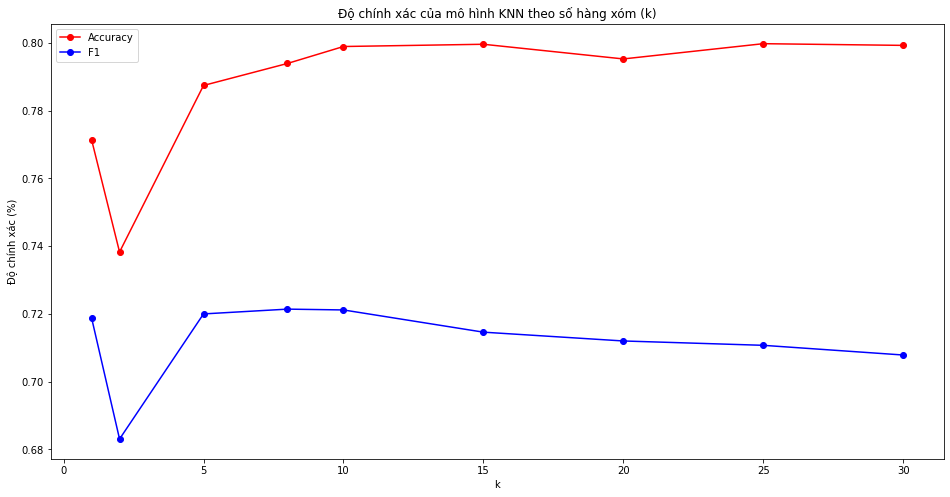

In [13]:
# plot accuracy
plt.figure(figsize=(16, 8))
plt.title('Độ chính xác của mô hình KNN theo số hàng xóm (k)')
plt.xlabel('k')
plt.ylabel('Độ chính xác (%)')
plt.plot(k_list, mean_accuracy_scores, 'ro-')
plt.plot(k_list, mean_f1_scores, 'bo-')
plt.legend(['Accuracy', 'F1'], loc='best')
plt.savefig('./images/knn_accuracy.png', facecolor='whitesmoke')
plt.show()

In [12]:
# cố định k = 10, thay đổi khoảng cách
fixed_k = 10
distances = ['manhattan', 'euclidean']
mean_accuracy_scores = []
mean_f1_scores = []
mean_train_time = []
mean_valid_time = []
for dist in distances:
    # định nghĩa model
    knn = KNeighborsClassifier(n_neighbors=fixed_k, metric=dist)
    
    accs = []
    f1s = []
    train_times = []
    valid_times = []
    for train_index, valid_index in spliter.split(X_train, y_train):    
        # train model
        start = time.time_ns()
        knn.fit(train_features[train_index], y_train[train_index])
        train_times.append(time.time_ns() - start)
        
        # valid model
        start = time.time_ns()
        y_pred = knn.predict(train_features[valid_index])
        valid_times.append(time.time_ns() - start)
        
        # evaluate model
        accs.append(accuracy_score(y_train[valid_index], y_pred))
        f1s.append(f1_score(y_train[valid_index], y_pred, average='macro'))
    
    mean_train_time.append(mean(train_times))
    mean_valid_time.append(mean(valid_times))
    mean_accuracy_scores.append(mean(accs))
    mean_f1_scores.append(mean(f1s))
    
for i in range(len(distances)):
    print(f'Với distance = {distances[i]}:')
    print('\t - Thời gian train: {:.2f} ms'.format(mean_train_time[i] / 1e6))
    print('\t - Thời gian valid: {:.2f} ms'.format(mean_valid_time[i] / 1e6))
    print('\t - Accuracy score:  {:.2f} %'.format(mean_accuracy_scores[i] * 100))
    print('\t - F1 score:        {:.2f} %'.format(mean_f1_scores[i] * 100))

Với distance = manhattan:
	 - Thời gian train: 11.67 ms
	 - Thời gian valid: 472.54 ms
	 - Accuracy score:  25.84 %
	 - F1 score:        26.57 %
Với distance = euclidean:
	 - Thời gian train: 6.99 ms
	 - Thời gian valid: 139.02 ms
	 - Accuracy score:  79.90 %
	 - F1 score:        72.12 %


#### 2. Multinomial Naive Bayes


In [14]:
from sklearn.naive_bayes import MultinomialNB
alphas = [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.5, 0.8, 1, 2, 5, 8, 10]
mean_accuracy_scores = []
mean_f1_scores = []
mean_train_time = []
mean_valid_time = []
for a in alphas:
    # định nghĩa model
    model = MultinomialNB(alpha=a)
    
    accs = []
    f1s = []
    train_times = []
    valid_times = []
    for train_index, valid_index in spliter.split(X_train, y_train):    
        # train model
        start = time.time_ns()
        model.fit(train_features[train_index], y_train[train_index])
        train_times.append(time.time_ns() - start)
        
        # valid model
        start = time.time_ns()
        y_pred = model.predict(train_features[valid_index])
        valid_times.append(time.time_ns() - start)
        
        # evaluate model
        accs.append(accuracy_score(y_train[valid_index], y_pred))
        f1s.append(f1_score(y_train[valid_index], y_pred, average='macro'))
    
    mean_train_time.append(mean(train_times))
    mean_valid_time.append(mean(valid_times))
    mean_accuracy_scores.append(mean(accs))
    mean_f1_scores.append(mean(f1s))
    
for i in range(len(alphas)):
    print(f'Với alpha = {alphas[i]}:')
    print('\t - Thời gian train: {:.2f} ms'.format(mean_train_time[i] / 1e6))
    print('\t - Thời gian valid: {:.2f} ms'.format(mean_valid_time[i] / 1e6))
    print('\t - Accuracy score:  {:.2f} %'.format(mean_accuracy_scores[i] * 100))
    print('\t - F1 score:        {:.2f} %'.format(mean_f1_scores[i] * 100))

Với alpha = 0.001:
	 - Thời gian train: 30.52 ms
	 - Thời gian valid: 2.99 ms
	 - Accuracy score:  82.75 %
	 - F1 score:        74.57 %
Với alpha = 0.005:
	 - Thời gian train: 30.42 ms
	 - Thời gian valid: 2.69 ms
	 - Accuracy score:  83.95 %
	 - F1 score:        76.22 %
Với alpha = 0.01:
	 - Thời gian train: 30.91 ms
	 - Thời gian valid: 2.80 ms
	 - Accuracy score:  84.15 %
	 - F1 score:        75.63 %
Với alpha = 0.05:
	 - Thời gian train: 32.31 ms
	 - Thời gian valid: 3.19 ms
	 - Accuracy score:  81.91 %
	 - F1 score:        65.40 %
Với alpha = 0.1:
	 - Thời gian train: 31.32 ms
	 - Thời gian valid: 2.39 ms
	 - Accuracy score:  80.33 %
	 - F1 score:        61.78 %
Với alpha = 0.2:
	 - Thời gian train: 29.02 ms
	 - Thời gian valid: 2.49 ms
	 - Accuracy score:  77.45 %
	 - F1 score:        57.19 %
Với alpha = 0.5:
	 - Thời gian train: 30.82 ms
	 - Thời gian valid: 3.09 ms
	 - Accuracy score:  73.25 %
	 - F1 score:        50.65 %
Với alpha = 0.8:
	 - Thời gian train: 30.92 ms
	 - Thời 

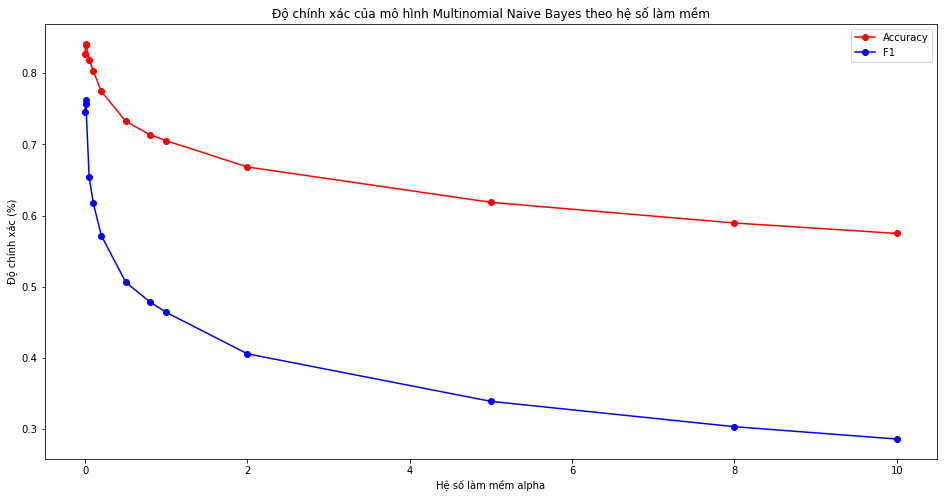

In [15]:
# plot accuracy
plt.figure(figsize=(16, 8))
plt.title('Độ chính xác của mô hình Multinomial Naive Bayes theo hệ số làm mềm')
plt.xlabel('Hệ số làm mềm alpha')
plt.ylabel('Độ chính xác (%)')
plt.plot(alphas, mean_accuracy_scores, 'ro-')
plt.plot(alphas, mean_f1_scores, 'bo-')
plt.legend(['Accuracy', 'F1'], loc='best')
plt.savefig('./images/mnb_a_accuracy.png', facecolor='whitesmoke')
plt.show()

In [1]:
# cố định phương pháp hiệu chình là l2 và C = 2, thay đổi thuật toán tối ưu
from sklearn.linear_model import LogisticRegression
opts = {'newton-cg':['l2', 'none'], 'lbfgs':['l2', 'none'], 'liblinear':['l1', 'l2'], 'sag':['l2', 'none'], 'saga':['elasticnet', 'l1', 'l2', 'none']}
fixed_C = 2
fixed_reg = 'l2'
MAX_ITER = 100_000

mean_accuracy_scores = []
mean_f1_scores = []
mean_train_time = []
mean_valid_time = []
for opt in opts.keys():
    print('Thuật toán tối ưu: ', opt)
    # định nghĩa model
    model = LogisticRegression(solver=opt, penalty=fixed_reg, C=2, max_iter=MAX_ITER)

    accs = []
    f1s = []
    train_times = []
    valid_times = []
    
    for train_index, valid_index in spliter.split(X_train, y_train):    
        # train model
        start = time.time_ns()
        model.fit(train_features[train_index], y_train[train_index])
        train_times.append(time.time_ns() - start)

        # valid model
        start = time.time_ns()
        y_pred = model.predict(train_features[valid_index])
        valid_times.append(time.time_ns() - start)

        # evaluate model
        accs.append(accuracy_score(y_train[valid_index], y_pred))
        f1s.append(f1_score(y_train[valid_index], y_pred, average='macro'))
    
    mean_accuracy_scores.append(mean(accs))
    mean_f1_scores.append(mean(f1s))
    mean_train_time.append(mean(train_times))
    mean_valid_time.append(mean(valid_times))
    
    print('\t - Thời gian train: {:.2f} ms'.format(mean_train_time[-1] / 1e6))
    print('\t - Thời gian valid: {:.2f} ms'.format(mean_valid_time[-1] / 1e6))
    print('\t - Accuracy score:  {:.2f} %'.format(mean_accuracy_scores[-1] * 100))
    print('\t - F1 score:        {:.2f} %'.format(mean_f1_scores[-1] * 100))

Thuật toán tối ưu:  newton-cg


NameError: name 'spliter' is not defined

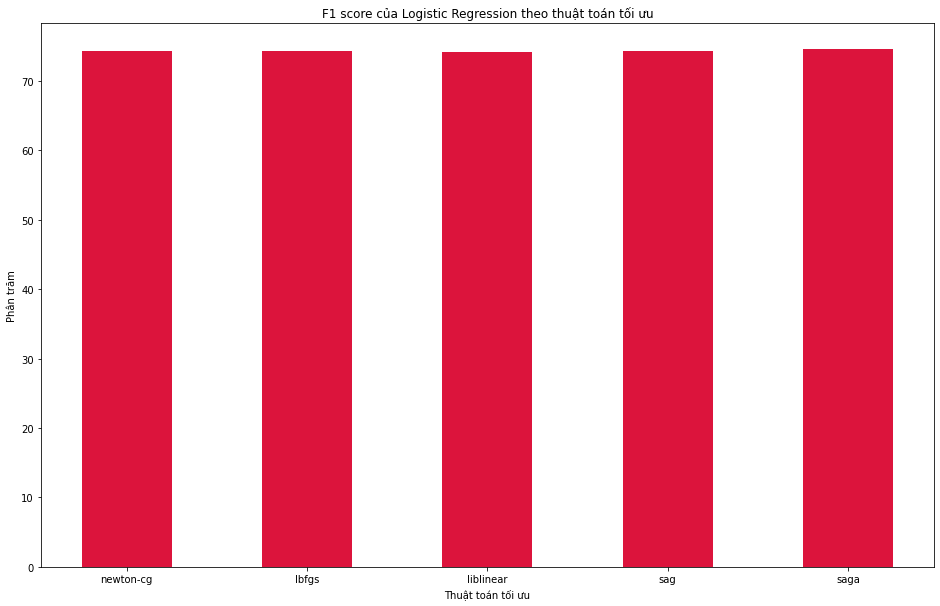

In [34]:
# Về f1
plt.figure(figsize=(16, 10))
plt.title('F1 score của Logistic Regression theo thuật toán tối ưu')
plt.xlabel('Thuật toán tối ưu')
plt.ylabel('Phân trăm')
plt.bar(opts.keys(), np.array(mean_f1_scores) * 100, color='crimson', width=0.5, label='F1')
plt.savefig('./images/lgres_opt_f1_comparision.png', facecolor='whitesmoke')
plt.show()

In [1]:
# cố định thuật toán tối ưu là SAG, thay đổi phương pháp hiệu chỉnh và hệ số hiệu chỉnh
from sklearn.linear_model import LogisticRegression
Cs = [1, 2, 5, 10, 16]

for reg in opts['sag']:
    print('Phương pháp hiệu chỉnh: ', reg)
    if reg != 'none':
        for c in Cs:
            print('\tHệ số hiệu chỉnh: ', c)
            # định nghĩa model
            model = LogisticRegression(solver='sag', penalty=reg, C=c, max_iter=100_000)

            accs = []
            f1s = []
            train_times = []
            valid_times = []

            for train_index, valid_index in spliter.split(X_train, y_train):    
                # train model
                start = time.time_ns()
                model.fit(train_features[train_index], y_train[train_index])
                train_times.append(time.time_ns() - start)

                # valid model
                start = time.time_ns()
                y_pred = model.predict(train_features[valid_index])
                valid_times.append(time.time_ns() - start)

                # evaluate model
                accs.append(accuracy_score(y_train[valid_index], y_pred))
                f1s.append(f1_score(y_train[valid_index], y_pred, average='macro'))

            print('\t - Thời gian train: {:.2f} ms'.format(mean(train_times) / 1e6))
            print('\t - Thời gian valid: {:.2f} ms'.format(mean(valid_times) / 1e6))
            print('\t - Accuracy score:  {:.2f} %'.format(mean(accs) * 100))
            print('\t - F1 score:        {:.2f} %'.format(mean(f1s) * 100))
    else:
        # định nghĩa model
        model = LogisticRegression(solver='sag', penalty=reg, max_iter=100_000)

        accs = []
        f1s = []
        train_times = []
        valid_times = []

        for train_index, valid_index in spliter.split(X_train, y_train):    
            # train model
            start = time.time_ns()
            model.fit(train_features[train_index], y_train[train_index])
            train_times.append(time.time_ns() - start)

            # valid model
            start = time.time_ns()
            y_pred = model.predict(train_features[valid_index])
            valid_times.append(time.time_ns() - start)

            # evaluate model
            accs.append(accuracy_score(y_train[valid_index], y_pred))
            f1s.append(f1_score(y_train[valid_index], y_pred, average='macro'))

        print('\t - Thời gian train: {:.2f} ms'.format(mean(train_times) / 1e6))
        print('\t - Thời gian valid: {:.2f} ms'.format(mean(valid_times) / 1e6))
        print('\t - Accuracy score:  {:.2f} %'.format(mean(accs) * 100))
        print('\t - F1 score:        {:.2f} %'.format(mean(f1s) * 100))

NameError: name 'opts' is not defined

In [36]:
# Do SAGA có hỗ trợ phương pháp elasticnet nên trước tiên, cần tiến hành chọn hệ số cho phương pháp này trước
# Cố định thuật toán tối ưu SAGA, phương pháp hiệu chỉnh elasticnet, hệ số C = 2
# Những giá trị sẽ sử dụng cho l1_ratio là [0.1, 0.2, 0.5, 0.8, 1.0]
ratios = [0.1, 0.2, 0.5, 0.8, 1.0]

print('Phương pháp hiệu chỉnh: elasticnet')
for ratio in ratios:
    print('\tL1 ratio: ', ratio)
    # định nghĩa model
    model = LogisticRegression(solver='saga', penalty='elasticnet', C=2, l1_ratio=ratio, max_iter=100_000)

    accs = []
    f1s = []
    train_times = []
    valid_times = []

    for train_index, valid_index in spliter.split(X_train, y_train):    
        # train model
        start = time.time_ns()
        model.fit(train_features[train_index], y_train[train_index])
        train_times.append(time.time_ns() - start)

        # valid model
        start = time.time_ns()
        y_pred = model.predict(train_features[valid_index])
        valid_times.append(time.time_ns() - start)

        # evaluate model
        accs.append(accuracy_score(y_train[valid_index], y_pred))
        f1s.append(f1_score(y_train[valid_index], y_pred, average='macro'))

    print('\t - Thời gian train: {:.2f} ms'.format(mean(train_times) / 1e6))
    print('\t - Thời gian valid: {:.2f} ms'.format(mean(valid_times) / 1e6))
    print('\t - Accuracy score:  {:.2f} %'.format(mean(accs) * 100))
    print('\t - F1 score:        {:.2f} %'.format(mean(f1s) * 100))

Phương pháp hiệu chỉnh: elasticnet
	L1 ratio:  0.1
	 - Thời gian train: 27741.34 ms
	 - Thời gian valid: 3.39 ms
	 - Accuracy score:  83.78 %
	 - F1 score:        74.37 %
	L1 ratio:  0.2
	 - Thời gian train: 16348.25 ms
	 - Thời gian valid: 3.69 ms
	 - Accuracy score:  83.75 %
	 - F1 score:        74.31 %
	L1 ratio:  0.5
	 - Thời gian train: 8565.34 ms
	 - Thời gian valid: 3.39 ms
	 - Accuracy score:  83.46 %
	 - F1 score:        74.61 %
	L1 ratio:  0.8
	 - Thời gian train: 8501.55 ms
	 - Thời gian valid: 2.99 ms
	 - Accuracy score:  82.58 %
	 - F1 score:        74.67 %
	L1 ratio:  1.0
	 - Thời gian train: 38106.15 ms
	 - Thời gian valid: 2.49 ms
	 - Accuracy score:  82.15 %
	 - F1 score:        75.35 %


In [ ]:
# cố định thuật toán tối ưu là SAGA, thay đổi phương pháp hiệu chỉnh và hệ số hiệu chỉnh
# đối với phương pháp elasticnet, cố định tỉ số L1 là 0.5
from sklearn.linear_model import LogisticRegression
Cs = [1, 2, 5, 10, 16]
best_ratio = 0.5
opts = {'newton-cg':['l2', 'none'], 'lbfgs':['l2', 'none'], 'liblinear':['l1', 'l2'], 'sag':['l2', 'none'], 'saga':['elasticnet', 'l1', 'l2', 'none']}

# do việc thử nhiều tham số và phương pháp khác nhau nên đôi khi có thể dẫn tới việc mô hình không hội tụ
# để tránh vấn đề này cũng như tiết kiệm thời gian huấn luyện thì ta sẽ giới hạn số lần lặp tối đa là 10,000
MAX_ITER = 10_000

for reg in opts['saga']:
    print('Phương pháp hiệu chỉnh: ', reg)
    if reg != 'none':
        for c in Cs:
            print('\tHệ số hiệu chỉnh: ', c)
            # định nghĩa model
            if reg == 'elasticnet':
                model = LogisticRegression(solver='saga', penalty=reg, C=c, l1_ratio=best_ratio, max_iter=MAX_ITER)
            else:
                model = LogisticRegression(solver='saga', penalty=reg, C=c, max_iter=MAX_ITER)

            accs = []
            f1s = []
            train_times = []
            valid_times = []

            for train_index, valid_index in spliter.split(X_train, y_train):    
                # train model
                start = time.time_ns()
                model.fit(train_features[train_index], y_train[train_index])
                train_times.append(time.time_ns() - start)

                # valid model
                start = time.time_ns()
                y_pred = model.predict(train_features[valid_index])
                valid_times.append(time.time_ns() - start)

                # evaluate model
                accs.append(accuracy_score(y_train[valid_index], y_pred))
                f1s.append(f1_score(y_train[valid_index], y_pred, average='macro'))

            print('\t - Thời gian train: {:.2f} ms'.format(mean(train_times) / 1e6))
            print('\t - Thời gian valid: {:.2f} ms'.format(mean(valid_times) / 1e6))
            print('\t - Accuracy score:  {:.2f} %'.format(mean(accs) * 100))
            print('\t - F1 score:        {:.2f} %'.format(mean(f1s) * 100))
    else:
        # định nghĩa model
        model = LogisticRegression(solver='saga', penalty=reg, max_iter=MAX_ITER)

        accs = []
        f1s = []
        train_times = []
        valid_times = []

        for train_index, valid_index in spliter.split(X_train, y_train):    
            # train model
            start = time.time_ns()
            model.fit(train_features[train_index], y_train[train_index])
            train_times.append(time.time_ns() - start)

            # valid model
            start = time.time_ns()
            y_pred = model.predict(train_features[valid_index])
            valid_times.append(time.time_ns() - start)

            # evaluate model
            accs.append(accuracy_score(y_train[valid_index], y_pred))
            f1s.append(f1_score(y_train[valid_index], y_pred, average='macro'))

        print('\t - Thời gian train: {:.2f} ms'.format(mean(train_times) / 1e6))
        print('\t - Thời gian valid: {:.2f} ms'.format(mean(valid_times) / 1e6))
        print('\t - Accuracy score:  {:.2f} %'.format(mean(accs) * 100))
        print('\t - F1 score:        {:.2f} %'.format(mean(f1s) * 100))

Phương pháp hiệu chỉnh:  elasticnet
	Hệ số hiệu chỉnh:  1
	 - Thời gian train: 3764.84 ms
	 - Thời gian valid: 2.49 ms
	 - Accuracy score:  81.11 %
	 - F1 score:        69.42 %
	Hệ số hiệu chỉnh:  2
	 - Thời gian train: 8434.39 ms
	 - Thời gian valid: 2.40 ms
	 - Accuracy score:  83.46 %
	 - F1 score:        74.61 %
	Hệ số hiệu chỉnh:  5
	 - Thời gian train: 23379.45 ms
	 - Thời gian valid: 3.89 ms
	 - Accuracy score:  84.25 %
	 - F1 score:        76.98 %
	Hệ số hiệu chỉnh:  10
	 - Thời gian train: 47219.97 ms
	 - Thời gian valid: 2.30 ms
	 - Accuracy score:  84.23 %
	 - F1 score:        77.34 %
	Hệ số hiệu chỉnh:  16
	 - Thời gian train: 76774.38 ms
	 - Thời gian valid: 2.69 ms
	 - Accuracy score:  84.13 %
	 - F1 score:        77.31 %
Phương pháp hiệu chỉnh:  l1
	Hệ số hiệu chỉnh:  1
	 - Thời gian train: 12456.83 ms
	 - Thời gian valid: 3.29 ms
	 - Accuracy score:  80.11 %
	 - F1 score:        72.51 %
	Hệ số hiệu chỉnh:  2
	 - Thời gian train: 37562.07 ms
	 - Thời gian valid: 2.59 ms


C:\Users\TheAnh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### So sánh những mô hình tốt nhất


In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Mô hình KNN với K = 10 và sử dụng khoảng cách Euclide
knn = KNeighborsClassifier(n_neighbors=10, metric='euclidean')

# Mô hình Multinomial Naive Bayes với alpha = 0.005
mnb = MultinomialNB(alpha=0.005)

# Mô hình Logistic Regression với thuật toán tối ưu SAGA, phương pháp hiệu chỉnh L2, C = 16
lreg = LogisticRegression(penalty='l2', C=16, solver='saga', max_iter=10_000)



In [28]:
# Validate mô hình
train_times = []
valid_times = []
accuracy_scores = []
f1_scores = []

In [29]:
# KNN Model
trains = []
valids = []
accs = []
f1s = []

for train_index, valid_index in spliter.split(X_train, y_train):    
    # train model
    start = time.time_ns()
    knn.fit(train_features[train_index], y_train[train_index])
    trains.append(time.time_ns() - start)

    # valid model
    start = time.time_ns()
    y_pred = knn.predict(train_features[valid_index])
    valids.append(time.time_ns() - start)

    # evaluate model
    accs.append(accuracy_score(y_train[valid_index], y_pred))
    f1s.append(f1_score(y_train[valid_index], y_pred, average='macro'))
    
# them vao list    
train_times.append(mean(trains))
valid_times.append(mean(valids))
accuracy_scores.append(mean(accs))
f1_scores.append(mean(f1s))

print(f'Mô hình KNN')
print('\t - Thời gian train: {:.2f} s'.format(train_times[-1] / 1e9))
print('\t - Thời gian valid: {:.2f} s'.format(valid_times[-1] / 1e9))
print('\t - Accuracy score:  {:.2f} %'.format(accuracy_scores[-1] * 100))
print('\t - F1 score:        {:.2f} %'.format(f1_scores[-1] * 100))

Mô hình KNN
	 - Thời gian train: 0.01 s
	 - Thời gian valid: 0.20 s
	 - Accuracy score:  79.90 %
	 - F1 score:        72.12 %


In [30]:
# Multinomial Naive Bayes Model
trains = []
valids = []
accs = []
f1s = []

for train_index, valid_index in spliter.split(X_train, y_train):    
    # train model
    start = time.time_ns()
    mnb.fit(train_features[train_index], y_train[train_index])
    trains.append(time.time_ns() - start)

    # valid model
    start = time.time_ns()
    y_pred = mnb.predict(train_features[valid_index])
    valids.append(time.time_ns() - start)

    # evaluate model
    accs.append(accuracy_score(y_train[valid_index], y_pred))
    f1s.append(f1_score(y_train[valid_index], y_pred, average='macro'))
    
# them vao list    
train_times.append(mean(trains))
valid_times.append(mean(valids))
accuracy_scores.append(mean(accs))
f1_scores.append(mean(f1s))

print(f'Mô hình Multinomial Naive Bayes')
print('\t - Thời gian train: {:.2f} s'.format(train_times[-1] / 1e9))
print('\t - Thời gian valid: {:.2f} s'.format(valid_times[-1] / 1e9))
print('\t - Accuracy score:  {:.2f} %'.format(accuracy_scores[-1] * 100))
print('\t - F1 score:        {:.2f} %'.format(f1_scores[-1] * 100))

Mô hình Multinomial Naive Bayes
	 - Thời gian train: 0.04 s
	 - Thời gian valid: 0.00 s
	 - Accuracy score:  83.95 %
	 - F1 score:        76.22 %


In [31]:
# Logistic Regression Model
trains = []
valids = []
accs = []
f1s = []

for train_index, valid_index in spliter.split(X_train, y_train):    
    # train model
    start = time.time_ns()
    lreg.fit(train_features[train_index], y_train[train_index])
    trains.append(time.time_ns() - start)

    # valid model
    start = time.time_ns()
    y_pred = lreg.predict(train_features[valid_index])
    valids.append(time.time_ns() - start)

    # evaluate model
    accs.append(accuracy_score(y_train[valid_index], y_pred))
    f1s.append(f1_score(y_train[valid_index], y_pred, average='macro'))
    
# them vao list    
train_times.append(mean(trains))
valid_times.append(mean(valids))
accuracy_scores.append(mean(accs))
f1_scores.append(mean(f1s))

print(f'Mô hình Logistic Regression')
print('\t - Thời gian train: {:.2f} s'.format(train_times[-1] / 1e9))
print('\t - Thời gian valid: {:.2f} s'.format(valid_times[-1] / 1e9))
print('\t - Accuracy score:  {:.2f} %'.format(accuracy_scores[-1] * 100))
print('\t - F1 score:        {:.2f} %'.format(f1_scores[-1] * 100))

Mô hình Logistic Regression
	 - Thời gian train: 7.23 s
	 - Thời gian valid: 0.00 s
	 - Accuracy score:  84.95 %
	 - F1 score:        78.23 %


**Kết luận:** Vậy mô hình được lựa chọn là Logistic Regression với tham số như sau: Thuật toán tối ưu SAGA, hiệu chỉnh L2, C = 16

### Huấn luyện và đánh giá mô hình
#### Huấn luyện

In [80]:
# Đầu tiên, mô hình đã được chọn là Logistic Regression, SAGA, L2, C=16
# Ta tiến hành huấn luyện 
start = time.time()
model = LogisticRegression(penalty='l2', C=16, solver='saga', max_iter=10_000, random_state=rstate)
model.fit(train_features, y_train)
print('Huấn luyện xong mô hình sau {:.2f}s'.format(time.time() - start))

Huấn luyện xong mô hình sau 6.52s


#### Đánh giá

In [81]:
# Đánh giá các mô hình trên tập test

# Trích chọn đặc trưng của tập test
test_features = feature_extractor.transform(X_test)

In [82]:
# Đánh giá
y_pred = model.predict(test_features)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy score: {:.2f} %'.format(acc * 100))
print('F1 score:       {:.2f} %'.format(f1 * 100))

Accuracy score: 84.85 %
F1 score:       80.12 %


In [85]:
from sklearn.metrics import classification_report, confusion_matrix

# report
print(classification_report(y_test, y_pred))

                          precision    recall  f1-score   support

               am-nhac-1       0.94      0.98      0.96        51
     chinh-tri-triet-hoc       0.77      0.59      0.67       126
               du-lich-1       0.75      0.52      0.61        29
         khoa-hoc-co-ban       0.78      0.55      0.65        65
       khoa-hoc-ky-thuat       0.90      0.91      0.91       112
khoa-hoc-tu-nhien-xa-hoi       0.65      0.80      0.72       235
          lich-su-dia-ly       0.75      0.82      0.78       289
      my-thuat-kien-truc       0.97      0.94      0.96       105
       nghiep-vu-bao-chi       1.00      0.64      0.78        14
         nong-lam-nghiep       1.00      0.89      0.94       112
             phap-luat-1       0.97      0.98      0.98       184
           sach-hoc-nghe       0.75      0.33      0.46         9
           sach-ton-giao       0.87      0.91      0.89       251
                the-thao       0.96      0.79      0.87       101
      van

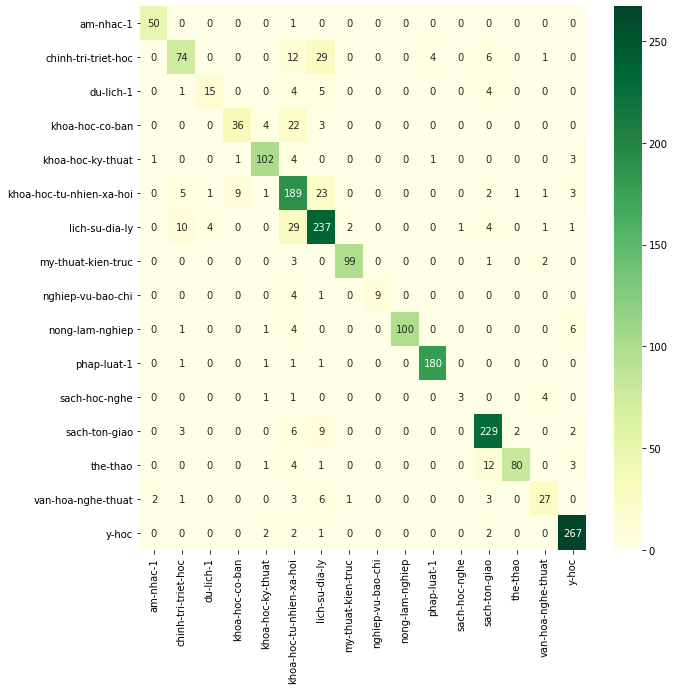

In [90]:
# confuse matrix
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred, labels=labels)
plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='YlGn' , xticklabels=labels, yticklabels=labels)
plt.savefig('./images/conf_matrix.png', facecolor='whitesmoke')

#### Kết luận
Lưu mô hình và kết thúc

In [83]:
# Lưu mô hình
import pickle
import os

save_dir = './saved_model'
if not os.path.exists(save_dir):
    os.mkdir(save_dir)
    
path = save_dir + '/best_model.sav'
pickle.dump(model, open(path, 'wb'))
print('Lưu mô hình thành công vào địa chỉ {}'.format(path))

Lưu mô hình thành công vào địa chỉ ./saved_model/best_model.sav
